In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv')

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [4]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [5]:
df[['Region']]=df[['Region']].astype(int)

In [6]:
df=df.dropna().reset_index(drop=True)

In [15]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [7]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [8]:
df=df.drop(122).reset_index(drop=True)

In [9]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [21]:
## fix spaces in col name
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [10]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [11]:
df[['month','day','year', 'Temperature', 'RH', 'Ws']]=df[['month','day','year', 'Temperature', 'RH', 'Ws']].astype(int)

In [12]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [14]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [15]:
df['Classes']=df['Classes'].str.strip()

In [16]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [17]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [18]:
df['Classes'].unique()

array([0, 1])

In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [20]:
df.to_csv('cleaned_data.csv',index=False)

In [6]:
df1=pd.read_csv('cleaned_data.csv')

In [7]:
df=df1

In [23]:
df=df.drop(['day', 'month', 'year'],axis=1)

In [24]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


<AxesSubplot: >

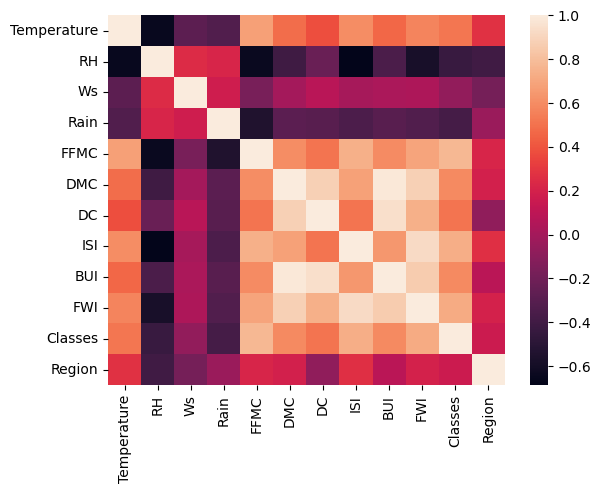

In [27]:
sns.heatmap(df.corr())

# monthly fire analysis

Text(0.5, 1.0, 'fire analysis of sidi- bel regions')

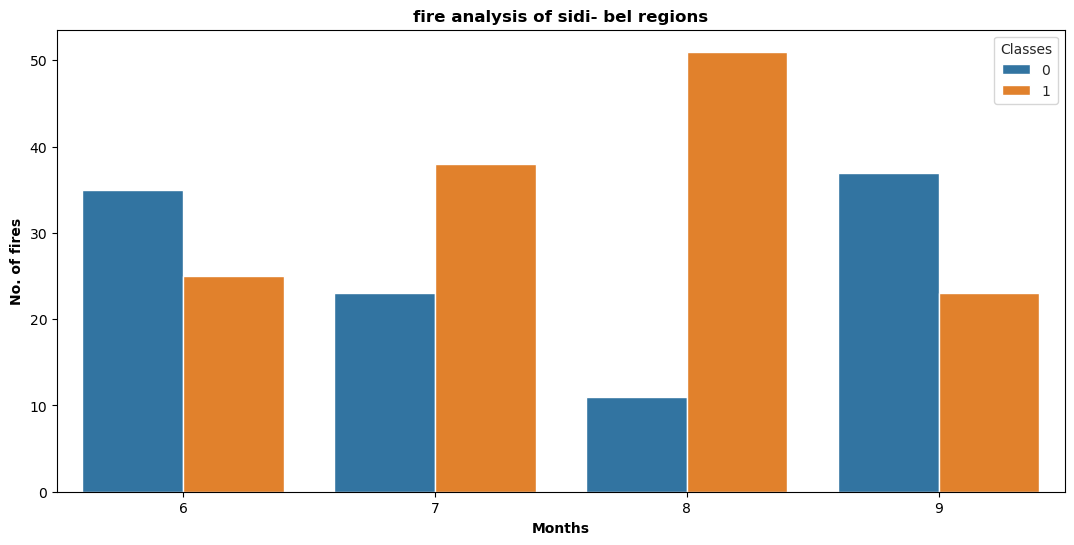

In [29]:
df_tmp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df1)
plt.xlabel("Months",weight='bold')
plt.ylabel("No. of fires",weight='bold')
plt.title("fire analysis of sidi- bel regions",weight='bold')

Text(0.5, 1.0, 'fire analysis of Bejaia regions')

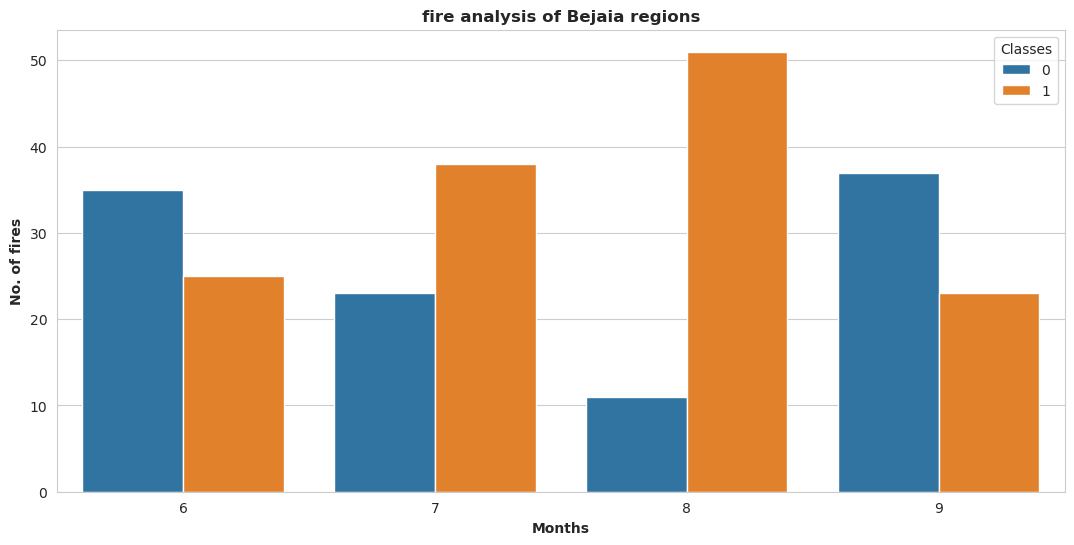

In [31]:
df_tmp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df1)
plt.xlabel("Months",weight='bold')
plt.ylabel("No. of fires",weight='bold')
plt.title("fire analysis of Bejaia regions",weight='bold')

In [32]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [34]:
X.head(1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [36]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [37]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [38]:
def correlation(dataset,threshold):
    col=set()
    corr_matrix=X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col.add(col_name)
    return col

In [39]:
corr_features=correlation(X_train,0.85)

In [40]:
corr_features

{'BUI', 'DC'}

In [41]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# linear regrassion

In [74]:
from sklearn.linear_model import LinearRegression
regrassor=LinearRegression()
regrassor.fit(X_train,y_train)
y_predicted_data=regrassor.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,y_predicted_data))
print(mean_absolute_error(y_test,y_predicted_data))
print(np.sqrt(mean_squared_error(y_test,y_predicted_data)))

0.6742766873791607
0.5468236465249985
0.8211435242265268


In [76]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predicted_data)
print(score)
adj_R=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_R)

0.9847657384266951
0.9820773393255237


# Lasso regrassion

In [77]:
from sklearn.linear_model import Lasso
Lasso=Lasso()
Lasso.fit(X_train,y_train)
y_predicted_data=Lasso.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,y_predicted_data))
print(mean_absolute_error(y_test,y_predicted_data))
print(np.sqrt(mean_squared_error(y_test,y_predicted_data)))

2.2483458918974772
1.133175994914409
1.4994485292591664


In [79]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predicted_data)
print(score)
adj_R=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_R)

0.9492020263112388
0.9402376780132222


# cross validation

In [80]:
from sklearn.linear_model import LassoCV
LassoCV=LassoCV(cv=5)
LassoCV.fit(X_train,y_train)
y_predicted_data=LassoCV.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,y_predicted_data))
print(mean_absolute_error(y_test,y_predicted_data))
print(np.sqrt(mean_squared_error(y_test,y_predicted_data)))

0.7924995554743627
0.6199701158263433
0.8902244410677358


In [82]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predicted_data)
print(score)
adj_R=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_R)

0.9820946715928275
0.9789349077562677


In [53]:
regrassor.alpha_

0.05725391318234411

In [62]:
regrassor.mse_path_

In [61]:
regrassor.alphas_

# ridge regrassion

In [83]:
from sklearn.linear_model import Ridge
Ridge=Ridge()
Ridge.fit(X_train,y_train)
y_predicted_data=Ridge.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,y_predicted_data))
print(mean_absolute_error(y_test,y_predicted_data))
print(np.sqrt(mean_squared_error(y_test,y_predicted_data)))
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predicted_data)
print('R_2:',score)
adj_R=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_R)

0.6949198918152074
0.5642305340105692
0.8336185529456548
R_2: 0.9842993364555513
0.9815286311241781


In [84]:
from sklearn.linear_model import RidgeCV
RidgeCV=RidgeCV(cv=10)
RidgeCV.fit(X_train,y_train)
y_predicted_data=RidgeCV.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,y_predicted_data))
print(mean_absolute_error(y_test,y_predicted_data))
print(np.sqrt(mean_squared_error(y_test,y_predicted_data)))
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predicted_data)
print('R_2:',score)
adj_R=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_R)

0.6949198918152074
0.5642305340105692
0.8336185529456548
R_2: 0.9842993364555513
0.9815286311241781


# elastic_ net

In [85]:
from sklearn.linear_model import ElasticNet
ElasticNet=ElasticNet()
ElasticNet.fit(X_train,y_train)
y_predicted_data=ElasticNet.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,y_predicted_data))
print(mean_absolute_error(y_test,y_predicted_data))
print(np.sqrt(mean_squared_error(y_test,y_predicted_data)))
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predicted_data)
print('R_2:',score)
adj_R=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_R)

5.5172511010252245
1.8822353634896005
2.3488829474933874
R_2: 0.8753460589519703
0.8533483046493768


In [86]:
scaler

StandardScaler()

In [87]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(Ridge,open('Ridge.pkl','wb'))


In [ ]:
model=pickle.load(open('regrassor.pkl','rb'))
model.predict(X_test)